In [2]:
import pryngles as pr
from pryngles import Consts
import numpy as np
from matplotlib import pyplot as pl
%matplotlib inline

In [196]:
import pandas as pd

In [86]:
sys=pr.System()
S=sys.add(kind="Star",radius=Consts.rsun/sys.ul,limb_coeffs=[0])
P=sys.add(kind="Planet",parent=S,a=0.5,e=0,radius=Consts.rjupiter/sys.ul)
R=sys.add(kind="Ring",parent=P,fi=2,fe=4.5,i=-30*Consts.deg)
RP=sys.ensamble_system(lamb=90*Consts.deg,beta=0*Consts.deg)
RP.Mstar=Consts.msun/sys.um
RP.lambq = 0
obs_time = 1*Consts.yr
n_points = int(obs_time/1800)
instants = np.linspace(0, obs_time, n_points)
Tps=[]
Ts=[]
for t in instants:
    RP.changeStellarPosition(kepler=True, x=(t/sys.ut))
    RP.updateTransit()
    Tp=RP.Tip.sum()
    T = Tp+RP.Tir.sum()
    Ts+=[T]
    Tps+=[Tp]

Tps = np.array(Tps)
Ts = np.array(Ts)

In [87]:
ecliptic,observer,star=RP.plotRingedPlanet(showfig=0)
star.set_size_inches(4, 4)
star.savefig('Figs/8-1.png')

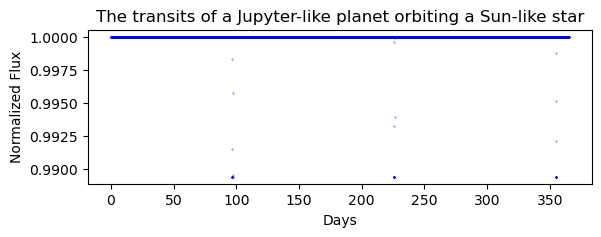

In [88]:
instants_days = instants/Consts.hr/24
fig, ax = pl.subplots(1, 1)
ax.plot(instants_days, (1-Tps), '.', markersize=0.5, c='b')
ax.set_xlabel('Days')
ax.set_ylabel('Normalized Flux')
ax.set_title('The transits of a Jupyter-like planet orbiting a Sun-like star')
fig.set_size_inches(6.5, 2)
fig.savefig('Figs/8-2.png')
fig.show()

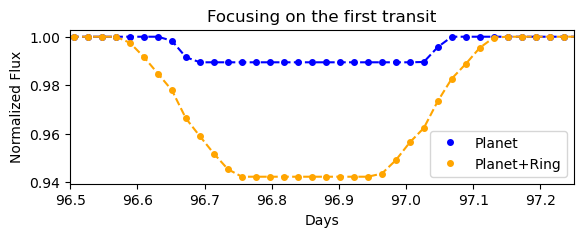

In [145]:
instants_days = instants/Consts.hr/24
fig, ax = pl.subplots(1, 1)
ax.plot(instants_days, (1-Tps), '.', markersize=8, c='b', label='Planet')
ax.plot(instants_days, (1-Tps), '--', markersize=4, c='b')
ax.plot(instants_days, (1-Ts),'.', markersize=8, c='orange', label='Planet+Ring')
ax.plot(instants_days, (1-Ts),'--', markersize=4, c='orange')
ax.set_ylabel('Normalized Flux')
ax.set_title('Focusing on the first transit')
ax.set_xlim(96.5, 97.25)
ax.set_xlabel('Days')
ax.legend()
fig.set_size_inches(6.5, 2)
fig.savefig('Figs/8-3.png')
fig.show()

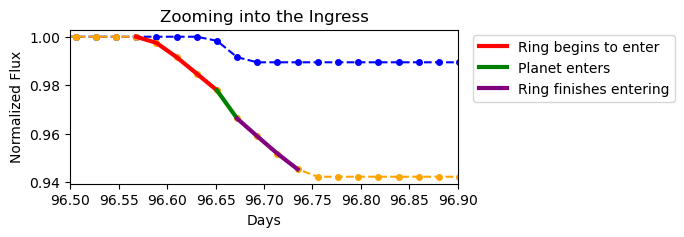

In [146]:
instants_days = instants/Consts.hr/24
fig, ax = pl.subplots(1, 1)
ax.plot(instants_days, (1-Tps), '.', markersize=8, c='b')
ax.plot(instants_days, (1-Tps), '--', markersize=4, c='b')

ax.plot(instants_days, (1-Ts),'.', markersize=8, c='orange')
ax.plot(instants_days, (1-Ts),'--', markersize=4, c='orange')
ax.plot(instants_days[4635:4640], (1-Ts)[4635:4640], lw=3,c='red', label='Ring begins to enter')
ax.plot(instants_days[4639:4641], (1-Ts)[4639:4641], lw=3,c='green', label='Planet enters')
ax.plot(instants_days[4640:4644], (1-Ts)[4640:4644], lw=3,c='purple', label='Ring finishes entering')
ax.set_ylabel('Normalized Flux')
ax.set_title('Zooming into the Ingress')
ax.set_xlim(96.5, 96.9)
ax.set_xlabel('Days')
ax.legend(loc='center', bbox_to_anchor=(1.3,0.75))
fig.set_size_inches(5, 2)
fig.savefig('Figs/9-1.png')
fig.show()

In [147]:
first_few_curves = np.loadtxt('Datasets/curves_1_0.txt', float)
first_few_ids = np.loadtxt('Datasets/non-ringed-ids.txt', str)

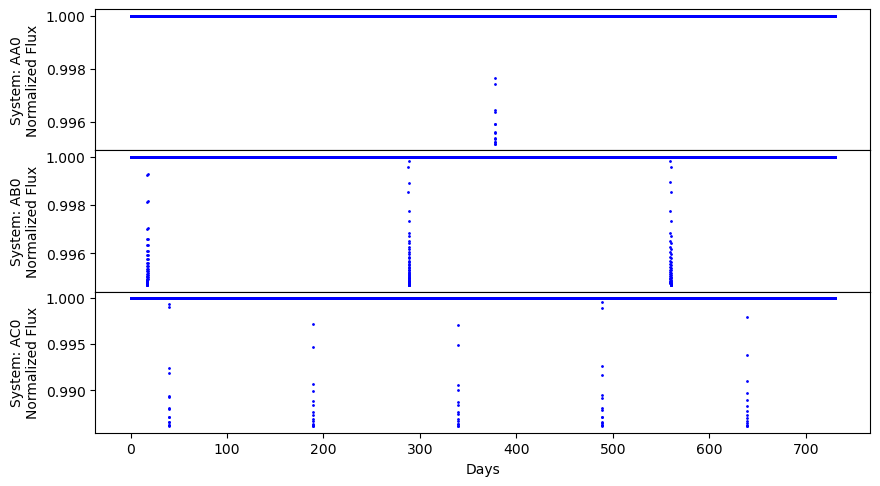

In [169]:
t = np.linspace(0, 35063, 35064)
fig, ax = pl.subplots(3, 1)
for i in range(0, 3):
    ax[i].plot(t/2/24, first_few_curves[i], '.', markersize=2, c='b')
    ax[i].set_ylabel('System: '+first_few_ids[i]+'\nNormalized Flux')
ax[2].set_xlabel('Days')
pl.subplots_adjust(hspace=0)
fig.set_size_inches(10, 5.5)
fig.savefig('Figs/26-1.png')
fig.show()




In [170]:
bad_cropped_curves = np.loadtxt('../attempt_1/all_cropped_curves.txt', float)
bad_ids = np.loadtxt('../attempt_1/all_ids.txt', str)

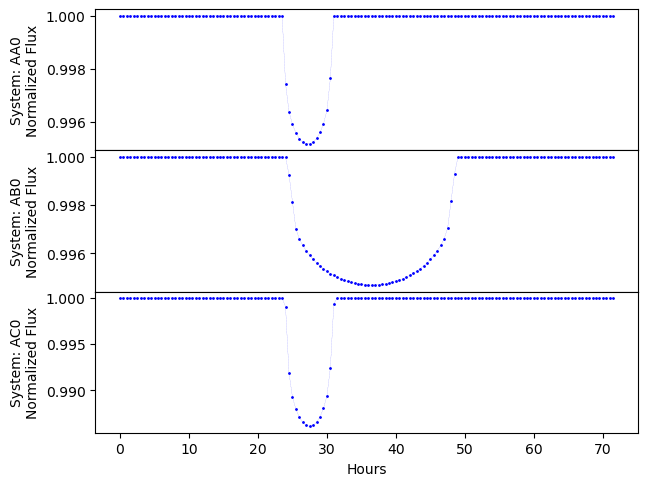

In [177]:
t = np.linspace(0, 143, 144)
fig, ax = pl.subplots(3, 1)
for i in range(0, 3):
    ax[i].plot(t/2, bad_cropped_curves[i], '.', markersize=2, c='b')
    ax[i].plot(t/2, bad_cropped_curves[i], '--', lw=0.1, c='b')
    ax[i].set_ylabel('System: '+bad_ids[i]+'\nNormalized Flux')
ax[2].set_xlabel('Hours')
pl.subplots_adjust(hspace=0)
fig.set_size_inches(7, 5.5)
fig.savefig('Figs/27-1.png')
fig.show()

In [178]:
cropped_curves = np.loadtxt('Datasets/non-ringed-cropped-curves.txt', float)
cropped_ids = np.loadtxt('Datasets/non-ringed-ids.txt', str)

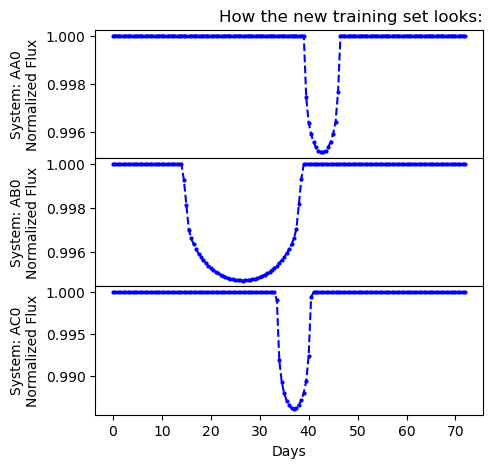

In [194]:
t = np.linspace(0, 144, 145)

fig, ax = pl.subplots(3, 1)

for i in range(0, 3):
    ax[i].plot(t/2, cropped_curves[i], '.', markersize=4, c='b')
    ax[i].plot(t/2, cropped_curves[i], '--', c='b')
    ax[i].set_ylabel('System: '+cropped_ids[i]+'\nNormalized Flux')

ax[2].set_xlabel('Days')
fig.set_size_inches(5, 5)
ax[0].set_title('How the new training set looks:', loc='right')
pl.subplots_adjust(hspace=0)
fig.savefig('Figs/35-1.png')
fig.show()

In [202]:
A_int = pd.read_csv('Datasets/Funky-rings/A-ringed-parameters.csv', index_col='Unnamed: 0')['ring_int_plrad'].values.min()
A_ext = pd.read_csv('Datasets/Funky-rings/A-ringed-parameters.csv', index_col='Unnamed: 0')['ring_ext_plrad'].values.max()
C_int = pd.read_csv('Datasets/Funky-rings/C-ringed-parameters.csv', index_col='Unnamed: 0')['ring_int_plrad'].values.min()
C_ext = pd.read_csv('Datasets/Funky-rings/C-ringed-parameters.csv', index_col='Unnamed: 0')['ring_ext_plrad'].values.max()
E_int = pd.read_csv('Datasets/Funky-rings/E-ringed-parameters.csv', index_col='Unnamed: 0')['ring_int_plrad'].values.min()
E_ext = pd.read_csv('Datasets/Funky-rings/E-ringed-parameters.csv', index_col='Unnamed: 0')['ring_ext_plrad'].values.max()

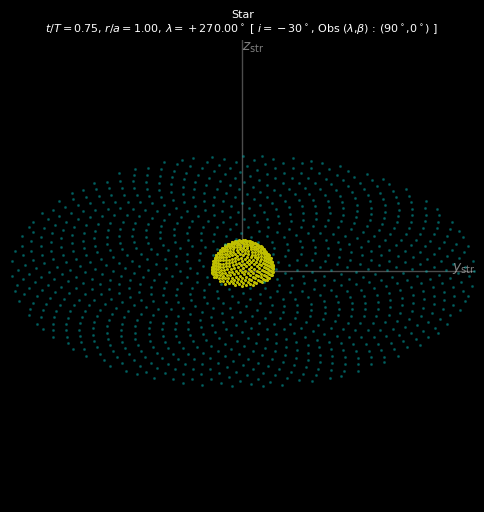

In [221]:
sys=pr.System()
S=sys.add(kind="Star",radius=Consts.rsun/sys.ul,limb_coeffs=[0])
P=sys.add(kind="Planet",parent=S,a=0.5,e=0,radius=Consts.rjupiter/sys.ul)
R=sys.add(kind="Ring",parent=P,fi=A_int,fe=A_ext,i=-30*Consts.deg, nspangles=1000)
RP=sys.ensamble_system(lamb=90*Consts.deg,beta=0*Consts.deg)
RP.changeStellarPosition(x=270*Consts.deg)
ecliptic,observer,star=RP.plotRingedPlanet(showfig=0)
star

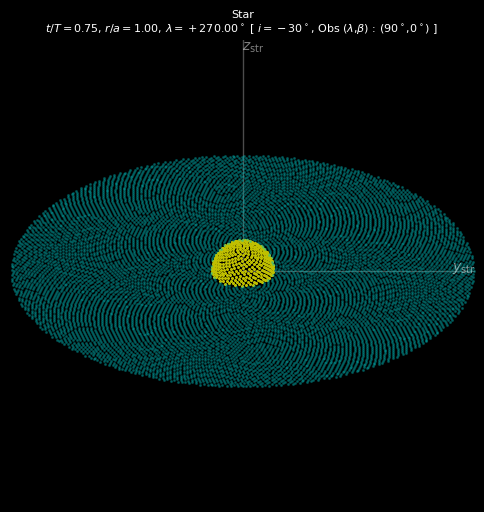

In [222]:
sys=pr.System()
S=sys.add(kind="Star",radius=Consts.rsun/sys.ul,limb_coeffs=[0])
P=sys.add(kind="Planet",parent=S,a=0.5,e=0,radius=Consts.rjupiter/sys.ul)
R=sys.add(kind="Ring",parent=P,fi=A_int,fe=A_ext,i=-30*Consts.deg, nspangles=10000)
RP=sys.ensamble_system(lamb=90*Consts.deg,beta=0*Consts.deg)
RP.changeStellarPosition(x=270*Consts.deg)
ecliptic,observer,star=RP.plotRingedPlanet(showfig=0)
star

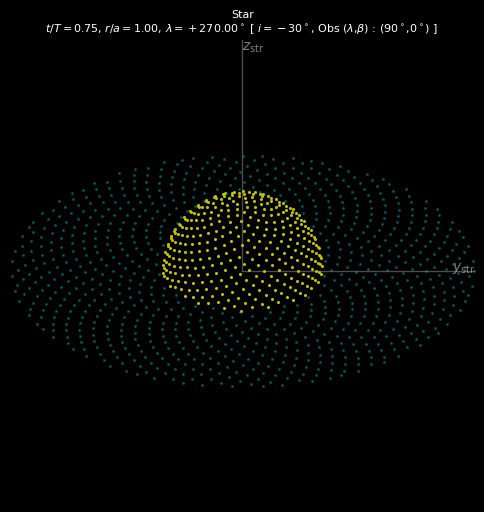

In [223]:
sys=pr.System()
S=sys.add(kind="Star",radius=Consts.rsun/sys.ul,limb_coeffs=[0])
P=sys.add(kind="Planet",parent=S,a=0.5,e=0,radius=Consts.rjupiter/sys.ul)
R=sys.add(kind="Ring",parent=P,fi=C_int,fe=C_ext,i=-30*Consts.deg, nspangles=1000)
RP=sys.ensamble_system(lamb=90*Consts.deg,beta=0*Consts.deg)
RP.changeStellarPosition(x=270*Consts.deg)
ecliptic,observer,star=RP.plotRingedPlanet(showfig=0)
star

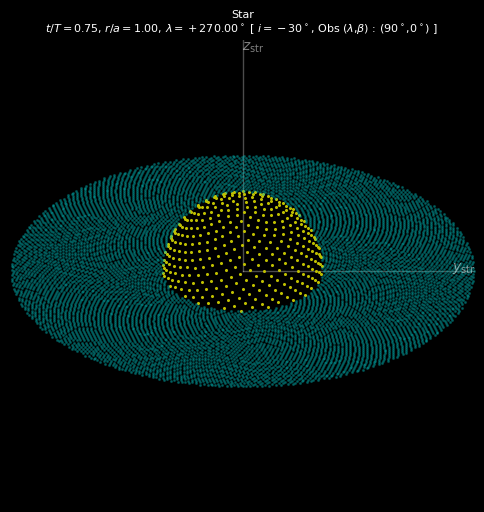

In [224]:
sys=pr.System()
S=sys.add(kind="Star",radius=Consts.rsun/sys.ul,limb_coeffs=[0])
P=sys.add(kind="Planet",parent=S,a=0.5,e=0,radius=Consts.rjupiter/sys.ul)
R=sys.add(kind="Ring",parent=P,fi=C_int,fe=C_ext,i=-30*Consts.deg, nspangles=10000)
RP=sys.ensamble_system(lamb=90*Consts.deg,beta=0*Consts.deg)
RP.changeStellarPosition(x=270*Consts.deg)
ecliptic,observer,star=RP.plotRingedPlanet(showfig=0)
star

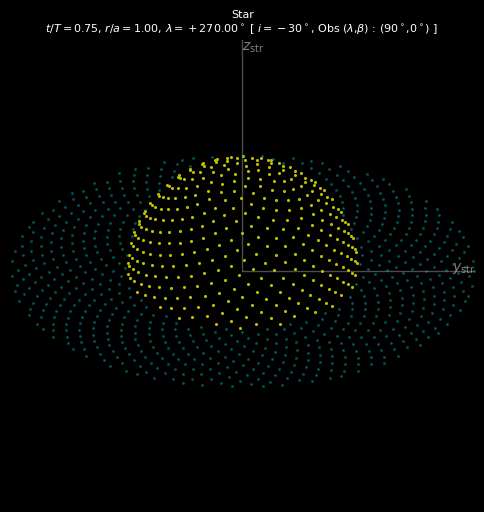

In [225]:
sys=pr.System()
S=sys.add(kind="Star",radius=Consts.rsun/sys.ul,limb_coeffs=[0])
P=sys.add(kind="Planet",parent=S,a=0.5,e=0,radius=Consts.rjupiter/sys.ul)
R=sys.add(kind="Ring",parent=P,fi=E_int,fe=E_ext,i=-30*Consts.deg, nspangles=1000)
RP=sys.ensamble_system(lamb=90*Consts.deg,beta=0*Consts.deg)
RP.changeStellarPosition(x=270*Consts.deg)
ecliptic,observer,star=RP.plotRingedPlanet(showfig=0)
star

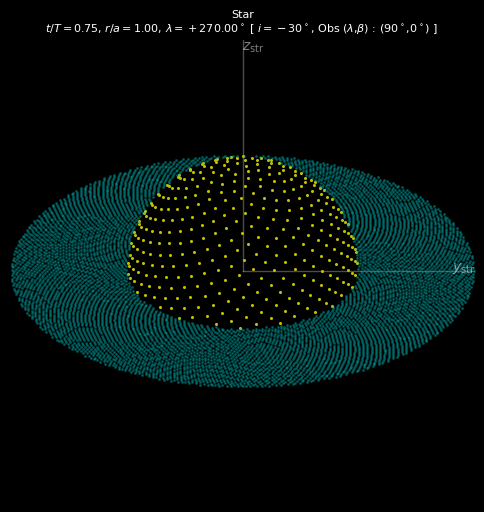

In [226]:
sys=pr.System()
S=sys.add(kind="Star",radius=Consts.rsun/sys.ul,limb_coeffs=[0])
P=sys.add(kind="Planet",parent=S,a=0.5,e=0,radius=Consts.rjupiter/sys.ul)
R=sys.add(kind="Ring",parent=P,fi=E_int,fe=E_ext,i=-30*Consts.deg, nspangles=10000)
RP=sys.ensamble_system(lamb=90*Consts.deg,beta=0*Consts.deg)
RP.changeStellarPosition(x=270*Consts.deg)
ecliptic,observer,star=RP.plotRingedPlanet(showfig=0)
star